# NNIA 18/19 Project 1:  PCA and & (Multiple) Linear Regression 

## Deadline: 07. December 2018, 23:59

**Important:** For all implementations in this project, make sure to use NumPy whenever possible. Most computations on vectors and matrices can be implemented very efficiently using the NumPy API. There is no need for looping over vectors etc. As a simple example, in order to compute the mean of a vector, just use `numpy.mean()`. If you are not familiar with NumPy please consult the NumPy tutorial that you find in the CMS under *Materials*. Further, in case of any doubts, the Forum is the best place to ask questions and discuss the project.  

In [196]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

---

## 1. Principal Component Analysis $~$ (15.0 points)

Features are our friends for prediction. For example, knowing the weight of a person is helpful for predicting his/her height. Knowing both the weight and age may improve the accuracy of our prediction. However, too many features could harm: each feature can be thought of as a dimension, $n$ features correspond to a $n$ dimensional space. In a high dimensional space ($n$ is very large), our data will distribute sparsely: if you draw unit grids in the space, the most of them will contain no data, which obstructs the learning process. This is called the *curse of dimensionality* (for more detail about the curse of dimensionality, see [here](http://www.visiondummy.com/2014/04/curse-dimensionality-affect-classification/)).


To overcome the curse of dimensionality, we simply reduce the dimensionality (i.e. reduce the number of features). We can either select a subset of all features, or we can apply PCA on our dataset. By specifying a $d$ ($d$<$n$), PCA will project our $n$ dimensional data onto a $d$ dimensional (affine) space. The assumption is that classification/regression should be easier in this $d$ dimensional space.

A tutorial of PCA can be found here: [PCA Tutorial](http://www.iro.umontreal.ca/~pift6080/H09/documents/papers/pca_tutorial.pdf) 

The goal of this exercise is to apply PCA on a small dataset: [The Digits Dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits) 

#### 1.1. Data Normalization
Before applying PCA to our data, we first need to center the features by subtracting the mean of each feature. That is, given a design matrix $X \in \mathbb{R}^{n \times d}$ ($n$ samples, each with $d$ dimensional features), we apply the following formula:

\begin{equation*}
  \hat{x_{ij}} = x_{ij} - \mu(x_i) \textrm{ for } i = 1,\cdots, d, j = 1,\cdots,n
\end{equation*}

where $\mu(x_i)$ is the mean of the $i$-th column of $X$.

**Question 1:** Is this centering step important regarding the performance of the PCA? What might happen if we don't center our data? (1 point)

A centering step (mean to 0) is not necessary if performing PCA on a correlation matrix because data is already centered after calculating correlations. 
PCA would be misleading if we apply on the non-centered data (instead of co-variiance matrix), then 1st principal may pierce the data not along the main direction of the data cloud and will be misleading. 
Therefore a mean of zero is needed for finding the basis that minimizes the mean square error of the approximation of the data.

**Task 1:** Implement the following function which performs data normalization (i.e. normalize the columns of $X$) according to the description above. (1 point)

In [197]:
def data_normalization(data):
    # This function will perform the normalization on data
    
    # turn DataFrame into a numpy array
    l,w = data.shape
    
    data_normalized = np.zeros((l,w))
    
    # Perform the normalization dimension wise
    for i in range(w):
        
        data_normalized[:,i] = data[:,i] - np.mean(data[:,i]) 
    
    return data_normalized


#### 1.2  Apply PCA on Digits Dataset
In the following we will apply PCA on the digits dataset from sklearn. This dataset consists of 1797 images of size 8X8, each images contain a handwritten digit (0-9).
The digits look as follows:
![Image of digits](https://scikit-learn.org/stable/_images/sphx_glr_plot_digits_classification_001.png)

In [198]:
# import the digits dataset
from sklearn import datasets

In [200]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# import the digits dataset
from sklearn import datasets

# perform data normalization
design_matrix = datasets.load_digits().data
targets = datasets.load_digits().target

data_normalized = data_normalization(design_matrix)

Before applying PCA, let's take a look on a subset of original features and analyse whether they are discriminative for digits classification.

**Task 2:** Implement the following using matplotlib: (2 points)
1. Construct a 2D scatter plot. Plot the value of feature 0 (on $x$ axis) and feature 2 (on $y$ axis) for each data point, use different colors indicating different classes. 
2. Set corresponding labels: assign label "feature 0" for $x$ axis and "feature 2" for $y$ axis.
3. Set the title of the plot as "A subset of original features".
4. Show legends for each class.
5. After you have finished the first four steps and plotted the graph, you might observe that many data points overlap. This is because many data points have exactly the same value w.r.t. feature 0 and feature 2. In order to have a better visualization, please jitter the data points in your scatter plot, this step is called jittering. For more details about jittering, see [here](https://stats.stackexchange.com/questions/253009/why-jitter-continuous-value-in-a-scatterplot).



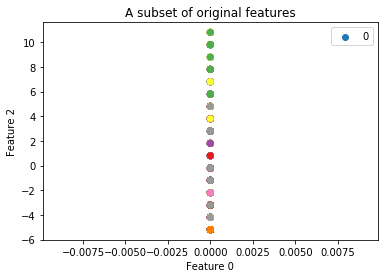

In [201]:
# TODO: Construct a 2D scatter plot
x = data_normalized[:,0] 
y = data_normalized[:,2]

fig, axes = plt.subplots(1, 1)
plt.scatter(x , y , c=targets, cmap='Set1')
plt.title('A subset of original features')
plt.xlabel("Feature 0")
plt.ylabel("Feature 2")
plt.legend(targets)
plt.show()


**Question 2:** What is the dimensionality of the new feature space? Is is easy to perform digit classification in this feature space? Justify your answer. (1 point)

The Dimesnionality of the new feature space is 64.
It is hard to do classification due to high dimensions and due to data sparsity. Different anomalies could arises when doing classification in high dimension feature space due to curse of dimesnionality. Hence features which are insignificant should be removed


**Task 3:** Implement the function `PCA()` below. The input of this function is a normalized dataset and a parameter $d$, which specifies the output dimension (dimension of the projected space). The output should be a dataset/matrix of $\mathbb{R}^{n \times d}$. (Hint: `numpy.linalg.eig()` might be helpful here.) (4 points)

In [202]:
def PCA(data, d):

    # Get the dimensions of the design matrix
    row, columns = data.shape
    
    # compute the co-variance matrix
    covariance_matrix=(np.matmul(np.transpose(data),data))/(row-1) #covariance Matrix
    
    #compute the eigen vectors and eigen values of the co-variance matrix
    value, vector = np.linalg.eig(covariance_matrix)
    
    # sort eigenvalue in decreasing order
    idx = np.argsort(value)[::-1]
    vector = vector[:,idx]
    
    # sort eigenvectors according to same index
    value = value[idx]
             
    # Select the first d eigen vectors according to the selected
    # number of reduced dimesnions
    vector = vector[:, :d]    
    
    # Now compute the Data Matrix in the reduced dimensional space
    PCA_Mat = (np.matmul(np.transpose(vector),np.transpose(data)))
    PCA_Matrix = np.transpose(PCA_Mat)
    return PCA_Matrix, vector
    

**Task 4:** Apply `PCA()` on the normalized dataset using $d=2$, then construct a 2D scatter plot presenting the data points in the projected space. (2 points)

Requirements for the 2D scatter plot:
1. Plot the value of the first principle components (on $x$ axis) and the second principle components (on $y$ axis) of each data point, use different colors for each class. 
2. Set corresponding labels: assign label "first principle component" for $x$ axis and "second principle component" for $y$ axis.
3. Set the title of the plot as "2 component PCA".
4. Add legends for each class.


In [203]:
# Apply PCA on normalized data set with 2 PC's
data_matrix, principal_com = PCA(data_normalized, 2)

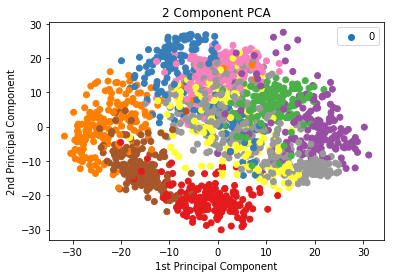

In [204]:
# TODO: Construct a 2D scatter plot
x = data_matrix[:,0] 
y = data_matrix[:,1]

fig, axes = plt.subplots(1, 1)
plt.scatter(x , y , c=targets, cmap='Set1')
plt.title('2 Component PCA')
plt.xlabel("1st Principal Component")
plt.ylabel("2nd Principal Component")
plt.legend(targets)
plt.show()


---
**Points:** $0.0$ of $2.0$
**Comments:** None

---

**Question 3:** Is it easier to perform classification on the transformed space? Justify your answer. (1 point)

*Answer:* 

It is easier to perform classification as the curse of dimensioanlity has reduced.
It can be seen that some classes are well seperated like red, brown, blue, orange while some classes like yellow, grey and green have high degree of overlapping. 

Though 2 principal components cover significant amount of variance, in order to achieve better results we need to consider 2 or 3 more PC's. Anyhow the result with 2 PC's is much better than the original dimensions because the data is sparse and some features (feature 0) have all zeros in the columns like we have observed in the first plot. 

**Question 4:** Now, modify the function  `data_normalization()` you implemented above: in additional to centering, divide each feature/column by its standard deviation. Then apply `PCA()` on this standardized data. Does the performance of PCA improve? Describe your findings (instead of modifying the original function you implemented above, please implement it again in the cell below). (2 points)

***Remark:*** One problem could occur when you divide the feature by its standard deviation: the standard deviation might be zero and division by zero is undefined. However, a standard deviation of zero can only be possible when all the values of a feature/column are the same (all equal to the mean). In this case, those features have no discriminative power so they can be removed from the analysis. Your implementation should be able to handle this case: all columns with zero standard deviation should be removed before standardize the data.

Text(0, 0.5, '2nd Principal Component')

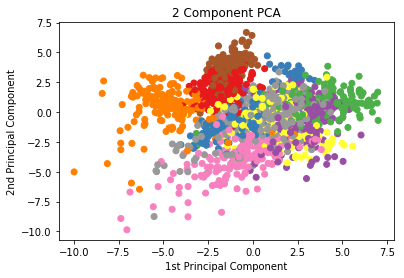

In [205]:
def data_normalization_modified(data):
    # This function will perform the normalization on data
    
    # turn DataFrame into a numpy array
    l,w = data.shape
    
    data_normalized = np.zeros((l,w))
    
    # Perform the normalization dimension wise
    for i in range(w):
        
        data_normalized[:,i] = data[:,i] - np.mean(data[:,i])
        
        std = np.std(data_normalized[:,i])
        if std != 0:
            data_normalized[:,i] = (data_normalized[:,i]/std)
        
    return data_normalized

# Standardise the data
data_normalized = data_normalization_modified(design_matrix)

# Apply PCA on normalized data set with 2 PC's
data_matrix, principal_com = PCA(data_normalized, 2)


# View the results on 2D plot
x = data_matrix[:,0] 
y = data_matrix[:,1]

fig, axes = plt.subplots(1, 1)
plt.scatter(x , y , c=targets, cmap='Set1')
plt.title('2 Component PCA')
plt.xlabel("1st Principal Component")
plt.ylabel("2nd Principal Component")

Yes the performance of PCA has improved. We can see now data is less scattered and therefore leads to low error rate. Even though there are huge overlaps but re-construction of data leads to low error. 


---
**Points:** $0.0$ of $1.0$
**Comments:** None

---

Finally, consider and the following (artificially generated) dataset:

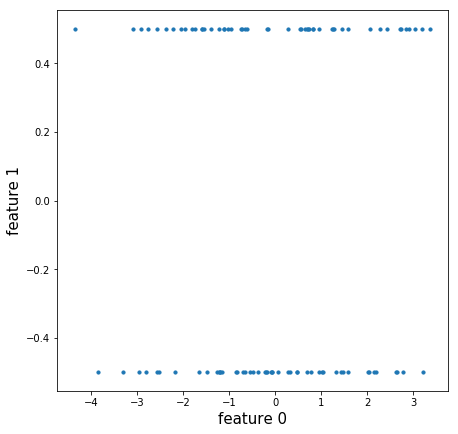

In [206]:
x = np.random.normal(loc=0.0, scale=2.0, size=100)
y = np.random.binomial(1, 0.5, size=100) - 0.5

fig = plt.figure(figsize = (7, 7))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('feature 0', fontsize = 15)
ax.set_ylabel('feature 1', fontsize = 15)
ax.scatter(x,y,s = 10);

**Question 5:** Is PCA suitable for the above dataset? Justify your answer. (1 point)

No PCA is not suitable for the above dataset because the dataset is already in 2D dimensions and scattered a lot. There is no single dimesnion in space that covers the maximum variance.  




## Multiple Linear Regression (15.0 points)

In this exercise we will deal with *multiple linear regression*. Performing regression on one independent (or explanatory) variable and a scalar dependent variable is called **simple linear regression**.
But, when there are more than one explanatory variable (i.e. $x^{(1)}, x^{(2)}, ...,x^{(k)}$), and a single scalar dependent variable (*y*), then it's called **multiple linear regression**. (Please don't confuse this with *multivariate linear regression* where we predict more than one (correlated) dependent variable.)

Here, we will implement a **multiple linear regression** model in Python/NumPy using the *Gradient Descent* algorithm. Particularly, we will be using **stochastic gradient descent** (*SGD*) where one performs the update step using a small set of training samples of size *batch_size* which we will set to 64, i.e. we go through the training samples sampling 64 at a time and perform gradient descent. Such a procedure is sometimes called **mini-batch gradient descent** in the deep learning community.

Going through all the training samples *once* is called an **epoch**. Ideally, the algorithm has to go through multiple epochs over the training samples, each time shuffling it, until a convergence criterion has been satisfied.

Here, we will set a *tolerance value* for the difference in error (i.e. change in mean squared error (MSE) values between subsequent epochs) that we will accept. Once this difference falls below the *tolerance value*, we terminate our training phase and return the parameters. 

We repeat the above training procedure for all possible hyperparameter combinations in order to find the best parameters (i.e. weights) for our model. For this so called *hyperparameter tuning* we will be using the validation data. 

As a next step, we will combine training data and validation data and make it as our *new training data*. We keep the test data as it is. Using the hyperparameter combination (for the least MSE) that we found above, we train the model *again* with the *new training data* and obtain the parameter (*i.e. weight vector*) after convergence according to our *tolerance value*.

Phew! That will be our much desired *weight vector*. This is then used on the *test data*, which has not been seen by our algorithm so far, to make a prediction. The resulting MSE value will be the so-called [*generalization error*](https://en.wikipedia.org/wiki/Generalization_error). It is this *generalization error* that we want it to be as low as possible for *unseen data* (implies that we can achieve higher accuracy).

#### 2.1 Dataset
For our task, we will be using the *Wine Quality* dataset and predict the quality of white wine based on 11 features such as acidity, citric acid content, residual sugar etc. . You can take a glance of the data using functions like *data.head()*.

In [207]:
from sklearn import linear_model
import tensorflow as tf

# get data
data_url = 'http://mlr.cs.umass.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'
data = pd.read_csv(data_url, sep=';')

# inspect data
display(data.head())
print(data.shape)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


(4898, 12)


#### 2.2. Loss function
We will use a *regularized* form of the MSE loss function. In matrix form it can be written as follows:

\begin{equation*}
    J(\textbf{w}) = \frac{1}{2} \Vert{X\textbf{w}-\textbf{y}}\Vert^{2} + \frac{\lambda}{2}\Vert{\textbf{w}}\Vert^{2}
\end{equation*}

It's important to note that, in the above equation, $X$, called **design matrix**, consists of data points in our dataset. Each row corresponds to a data point, each column correspondings to a feature. Therefore, the dimension of $X$ is *(number of data points, number of features)*. $X$ can be also thought as of the horizontal concatenation of shape *(batch_size, num_features)*. To make things easier, you can add the *bias* term as the first column of $X$. Take care to have the *weight* vector $\textbf{w}$ with matching dimensions. (Hint: see [Design_matrix#Multiple_regression](https://en.wikipedia.org/wiki/Design_matrix#Multiple_regression) for how $X$ with 2 features looks like for $1^{st}$ degree polynomial.)

**Task 5:** Derive the gradient (w.r.t $\textbf{w}$) for the regularized loss function given in 2.2. (1 point)


Gradient = 1\m((X^T * X * w) - ( X^T * Y) + (lambda * w)

---
**Points:** $0.0$ of $1.0$
**Comments:** None

---

#### 2.3. Matrix format for higher order polynomial

Written in matrix form, a linear regression model for second order would look like: <br />
$$\hat{\textbf{y}} = X\textbf{w}_{1} + X^{2}\textbf{w}_{2} + \textbf{b}$$

where $X^{2}$ is the element-wise squaring of the original design matrix $X$, $\textbf{w}_1$ and $\textbf{w}_2$ are the *weight* vectors, and **b** is the *bias* vector.

**Task 6:** Please write down the matrix format for a $9^{th}$ order linear regression model. (0.5 point)

*Answer:* 

---
$$\hat{\textbf{y}} = X\textbf{w}_{1} + X^{2}\textbf{w}_{2} + X^{3}\textbf{w}_{3} + X^{4}\textbf{w}_{4} + X^{5}\textbf{w}_{5} + X^{6}\textbf{w}_{6} + X^{7}\textbf{w}_{7} + X^{8}\textbf{w}_{8} + X^{9}\textbf{w}_{9} + \textbf{b}$$

---

#### 2.4. Hyperparameters
Next, we will experiment with three hyperparameters:

i) regularization parameter $\lambda$ <br />
ii) learning rate $\epsilon$ <br />
iii) order of polynomial *p*

And do a grid search over the values that these hyperparameters can take in order to select the best combination (i.e. the one that achieves lowest test error). This approach is called **hyperparameter optimization or tuning**.

In [208]:
# Fix possible hyperparameters
polynomial_orders = [1, 5, 9]
learning_rates = [1e-5, 1e-8]
lambdas = [0.1, 0.8]

# Fix batch size
batch_size = 64

# Get data as NumPy array
data_np = data.values

#### 2.5. Normalization
First of all, inspect the data, and understand its structure and features. Ideally, before starting to train our learning algorithm, we would want the data to be normalized. Here, we normalize the data (i.e. normalize each column) using the formula:

\begin{equation*}
  norm\_x_i = \frac{x_i - min(x)}{max(x) - min(x)}
\end{equation*}
where $x_i$ is the $i^{th}$ sample in feature $x$. Note that this formula is different to the formula in the PCA part.

**Task 7:** Complete the following function which performs normalization (i.e. normalizes columns of $X$). (1 point)

In [209]:
def data_normalization(data):    
    
    """Does a normalization of the data"""
    
    # Turning DataFrame into a numpy array
    l,w = data.shape
    data_normalized = np.zeros((l,w))
    # Feature wise Normalization
    for i in range(w):
        max_feat = np.amax(data[:,i])
        min_feat = np.amin(data[:,i])
        data_normalized[:,i] = (data[:,i]-min_feat)/(max_feat-min_feat)
    return data_normalized


# Perform data normalization
data_np = data_normalization(data_np)
print(data_np[:5, ])  # print first 5 rows

[[0.30769231 0.18627451 0.21686747 0.30828221 0.10682493 0.14982578
  0.37354988 0.26778485 0.25454545 0.26744186 0.12903226 0.5       ]
 [0.24038462 0.21568627 0.20481928 0.01533742 0.11869436 0.04181185
  0.28538283 0.13283208 0.52727273 0.31395349 0.24193548 0.5       ]
 [0.41346154 0.19607843 0.24096386 0.09662577 0.12166172 0.09756098
  0.20417633 0.15403894 0.49090909 0.25581395 0.33870968 0.5       ]
 [0.32692308 0.14705882 0.19277108 0.12116564 0.14540059 0.15679443
  0.41067285 0.16367843 0.42727273 0.20930233 0.30645161 0.5       ]
 [0.32692308 0.14705882 0.19277108 0.12116564 0.14540059 0.15679443
  0.41067285 0.16367843 0.42727273 0.20930233 0.30645161 0.5       ]]


**Question 5:** How is the normalization here different from the standardization implemented in the PCA exercise (see Question 4 in the PCA part)? (1 point)

This normalization is not very different from the PCA normalization. In PCA we have done mean centering to 0 and also standardaization equal to 1. 
Here the normalization in 2.5 make all the values to fall in between 0 and 1 and hence mean would always be greater or equal to 0 and less and equal to 1.
Moreover standard deviation would also be in between 0 and 1. 


In [210]:
# Split the data into training, validation, and test data
def split_data(data, n_train=3898, n_val=500, n_test=500):
    # (in-place) shuffling of data_npr along axis 0
    np.random.shuffle(data)

    n_val = n_train + n_val
    n_test = n_train + n_test
    
    X_train = data[0:n_train, 0:-1]
    Y_train = data[0:n_train, -1]
    
    X_val = data[n_train:n_val, 0:-1]
    Y_val = data[n_train:n_val, -1]
    
    X_test = data[n_test:, 0:-1]
    Y_test = data[n_test:, -1]
    
    return [(X_train, Y_train), (X_val, Y_val), (X_test, Y_test)]


# Shuffle only the training data along axis 0
def shuffle_train_data(X_train, Y_train):
    """called after each epoch"""
    perm = np.random.permutation(len(Y_train))
    Xtr_shuf = X_train[perm]
    Ytr_shuf = Y_train[perm]
    
    return Xtr_shuf, Ytr_shuf


#### 2.6. Implementation of required functions

**Task 8:** Complete the following function which computes the MSE value. You can ignore the regularization term and also the constants $\frac{1}{2}$. (0.5 point)

In [211]:
# Compute Mean Squared Error 
def compute_mse(prediction, ground_truth):

    # Compute the mean squared error
    mse = (np.square(prediction - ground_truth)).mean()
    
    return mse


**Task 9:** Implement a function which computes the prediction of your model. (0.5 point)

In [212]:
def get_prediction(X, W):
    
    # This function comoutes the predicted weights
    pred = np.matmul(X, W) 
    
    return pred


**Task 10:** Implement a function which computes the gradient of your loss function. That is, implement the gradient computed in Task 5. (0.5 point)

In [213]:
def compute_gradient(X, Y, Yhat, W, lambda_):
  
    #Gradient equation
    # 1/m ((X^T * X * w) - (X^T * Y)) + lambda*W)
    row, col = X.shape
    
    Yhat = np.matmul(X, W)
    X_trans = np.transpose
    
    grad = (( (np.matmul(X.transpose(), Yhat)) - (np.matmul(X.transpose(), Y)) ) / row) + lambda_*W 
    
    
    return grad

**Task 11:** Implement a function which performs a single update step of SGD. (0.5 point)

In [214]:
# Hint: avoid in-place modification
def sgd(gradient, lr, cur_W):

 
    # this function performs the single step gradient descent
    new_weights = cur_W - (lr * gradient)
    
    return new_weights



**Task 12:** Complete the following function which reformats your data as a design matrix. (0.5 point)

In [215]:
# concatenate X acc. to order of polynomial; likewise do it for W
# where X is design matrix, W is the corresponding weight vector
# concatenate matrix X horizontally, concatenate W vertically. That is, after this transformation, X gets broader and W gets longer
# [1 X X^2 X^3], [1 W1 W2 W3].T.
# 
def prepare_data_matrix(X, W, order):
    
    # This function prepares the data matrix aaccroding to the order of polynomial    
    row, col = X.shape
    
    #randomly initialze the weights
    # Note: By Random initialization of weights on each execution the answers might differ 
    W_new = np.random.randn((order*col)+1)
    #W_new = np.ones((order*col)+1)
    
    i = 0
    while(i < col):
        vec = X[:,i]
        
        j = 1
        while(j < order):
            vec_degree = np.power(vec, j+1)
            X = np.insert(X, i+j, vec_degree, axis =1)
            col = col + 1
            j = j+1
        
        i = i + j
    
    X = np.insert(X, 0, 1, axis=1)
    W = W_new
    
    return X, W        

#### 2.7. Training

**Task 13:** Complete the code in the following cell such that it performs **mini-batch gradient descent** on the training data for all possible hyperparameter combinations. (5 points)

Note: You can also define a function, named appropriately, which performs training. But, take care to do correct bookkeeping of hyperparameter combinations, weight vectors, and the MSE values.

In [216]:
# Get the data
splits = split_data(data_np)
X_train, Y_train, X_val, Y_val, X_test, Y_test = itertools.chain(*splits)

# Set tolerance value
tolerance = 1e-3
start = 1

# Initialize weight vector
W_init = np.random.randn(X_train.shape[1])

In [217]:
def train(X_train, W_init, polynomial_orders, learning_rates, lambdas):
    # I have added another paramter for true lables of output.
    # Compute all hyperparameter combination
    comb_gen = itertools.product(*(polynomial_orders, learning_rates, lambdas))
    hparams_comb = list(comb_gen)

    # Cache weights for each hyperparam combination
    weights_hist = {hpm:0 for hpm in hparams_comb}
    mse_dict = {hpm:0 for hpm in hparams_comb}
    mse_hist = []
    
    # Find optimal hyperparameters
    for order in polynomial_orders:
        for lr in learning_rates:
            for lamb in lambdas:
                # Initialize 
                mse_hist.append(np.inf)
                mse_diff = np.inf
                epochs = 1
                # TODO: Prepare data matrix Done
                X_train_new, W_init_new = prepare_data_matrix(X_train, W_init, order)
                
                
                while True:
                    # TODO: shuffle the data Done
                    Xtr_shuf, Ytr_shuf = shuffle_train_data(X_train_new, Y_train)
                    iteration = 1
                    nsamples = Xtr_shuf.shape[0]
                    bs = 0
                                    
                    # Perform a single epoch
                    while bs < nsamples:
                        Xtr = Xtr_shuf[bs: bs+batch_size]
                        Ytr = Ytr_shuf[bs: bs+batch_size]
                        #Achtung
                        #Define Yhat, ideally it should be Yhat = X*w
                        Yhat = Ytr;
                        
                        # TODO: do one step gradient descent Done
                        gradient = compute_gradient(Xtr, Ytr, Yhat, W_init_new, lamb)
                        W_vec = sgd(gradient, lr, W_init_new)
                        W_init_new = W_vec

                        bs += batch_size
                        iteration += 1

                    # TODO: do predcition on the entire (shuffled) dataset, compute mse and append it to the mse_hist
                    # Now W_init are the weights adjusted after gradient descent
                    Yhat = get_prediction(Xtr_shuf, W_vec)
                    
                    mse = compute_mse(Yhat, Ytr_shuf)
                    mse_hist.append(mse)
                    #print("MSE after epoch {} is {}".format(epochs, round(mse, 5)))
                    print("MSE after epoch {} is {} ".format(epochs, round(mse,5)))
                      
                    
                    #TODO: Stopping criterion: check whether diff-in-mse < tolerance
                    mse_diff = mse_hist[epochs-1] - mse_hist[epochs]
                    if mse_diff < tolerance:
                        #cache weight vector
                        weights_hist[(order, lr, lamb)] = W_vec
                        mse_dict[(order, lr, lamb)] = mse_hist[-1]
                        print("order: {} , learning rate: {} , regularizer: {} ".format(order, lr, lamb))
                        print("Convergence after epoch {} with MSE {}".format(epochs, round(mse_hist[-1], 5)), "\n")
                        break
                    epochs += 1
    
    return weights_hist, mse_hist

**Task 14:** Complete the following function which selects the best hyperparameter combination given a list of weights (i.e. the one that gives lowest MSE on **validation data**). (1 point)

In [218]:
# Select hparams of minimum MSE on Validation data
def select_best_hparams(X_val, W):
    hpm_best = ()
    mse_best = np.inf
    mse_val = {}
    
    for comb, weight in weights_hist.items():
        X_val_new, W_new = prepare_data_matrix(X_val, W, comb[0])
        
        Yhat = get_prediction(X_val_new, weight)
        mse = compute_mse(Yhat, Y_val)
        mse_val[comb] = mse

    hpm_best = min(mse_val, key=mse_val.get)
    mse_best = mse_val[hpm_best]
        
    return hpm_best, mse_best

In [224]:
# TODO: Train the model with all possible hyperparameter combinations
W_init = np.random.randn(X_train.shape[1])

weights_hist, mse_hist = train(X_train, W_init, polynomial_orders, learning_rates, lambdas)



# TODO: Find best hyperparameter combination
best_hpm_combination, best_mse = select_best_hparams(X_val, W_init)

print('Best hyperamarameters (on validation data): ', best_hpm_combination)
print('Corresponding MSE (on validation data): ', best_mse)

MSE after epoch 1 is 4.56861 
MSE after epoch 2 is 4.55827 
MSE after epoch 3 is 4.54795 
MSE after epoch 4 is 4.53765 
MSE after epoch 5 is 4.52738 
MSE after epoch 6 is 4.51714 
MSE after epoch 7 is 4.50691 
MSE after epoch 8 is 4.49671 
MSE after epoch 9 is 4.48653 
MSE after epoch 10 is 4.47638 
MSE after epoch 11 is 4.46624 
MSE after epoch 12 is 4.45614 
MSE after epoch 13 is 4.44605 
MSE after epoch 14 is 4.43599 
MSE after epoch 15 is 4.42595 
MSE after epoch 16 is 4.41593 
MSE after epoch 17 is 4.40593 
MSE after epoch 18 is 4.39596 
MSE after epoch 19 is 4.38602 
MSE after epoch 20 is 4.37609 
MSE after epoch 21 is 4.36619 
MSE after epoch 22 is 4.3563 
MSE after epoch 23 is 4.34645 
MSE after epoch 24 is 4.33661 
MSE after epoch 25 is 4.3268 
MSE after epoch 26 is 4.317 
MSE after epoch 27 is 4.30724 
MSE after epoch 28 is 4.29749 
MSE after epoch 29 is 4.28776 
MSE after epoch 30 is 4.27806 
MSE after epoch 31 is 4.26838 
MSE after epoch 32 is 4.25872 
MSE after epoch 33 is

MSE after epoch 350 is 2.0771 
MSE after epoch 351 is 2.07243 
MSE after epoch 352 is 2.06778 
MSE after epoch 353 is 2.06314 
MSE after epoch 354 is 2.05851 
MSE after epoch 355 is 2.05389 
MSE after epoch 356 is 2.04928 
MSE after epoch 357 is 2.04468 
MSE after epoch 358 is 2.04009 
MSE after epoch 359 is 2.03551 
MSE after epoch 360 is 2.03094 
MSE after epoch 361 is 2.02638 
MSE after epoch 362 is 2.02183 
MSE after epoch 363 is 2.0173 
MSE after epoch 364 is 2.01277 
MSE after epoch 365 is 2.00825 
MSE after epoch 366 is 2.00375 
MSE after epoch 367 is 1.99925 
MSE after epoch 368 is 1.99477 
MSE after epoch 369 is 1.99029 
MSE after epoch 370 is 1.98583 
MSE after epoch 371 is 1.98137 
MSE after epoch 372 is 1.97693 
MSE after epoch 373 is 1.97249 
MSE after epoch 374 is 1.96807 
MSE after epoch 375 is 1.96365 
MSE after epoch 376 is 1.95925 
MSE after epoch 377 is 1.95485 
MSE after epoch 378 is 1.95047 
MSE after epoch 379 is 1.94609 
MSE after epoch 380 is 1.94173 
MSE after 

MSE after epoch 618 is 1.14164 
MSE after epoch 619 is 1.13911 
MSE after epoch 620 is 1.13659 
MSE after epoch 621 is 1.13408 
MSE after epoch 622 is 1.13157 
MSE after epoch 623 is 1.12907 
MSE after epoch 624 is 1.12657 
MSE after epoch 625 is 1.12408 
MSE after epoch 626 is 1.12159 
MSE after epoch 627 is 1.11911 
MSE after epoch 628 is 1.11664 
MSE after epoch 629 is 1.11417 
MSE after epoch 630 is 1.11171 
MSE after epoch 631 is 1.10925 
MSE after epoch 632 is 1.1068 
MSE after epoch 633 is 1.10435 
MSE after epoch 634 is 1.10191 
MSE after epoch 635 is 1.09948 
MSE after epoch 636 is 1.09705 
MSE after epoch 637 is 1.09462 
MSE after epoch 638 is 1.0922 
MSE after epoch 639 is 1.08979 
MSE after epoch 640 is 1.08738 
MSE after epoch 641 is 1.08498 
MSE after epoch 642 is 1.08259 
MSE after epoch 643 is 1.08019 
MSE after epoch 644 is 1.07781 
MSE after epoch 645 is 1.07543 
MSE after epoch 646 is 1.07306 
MSE after epoch 647 is 1.07069 
MSE after epoch 648 is 1.06832 
MSE after 

MSE after epoch 988 is 0.51099 
MSE after epoch 989 is 0.50991 
MSE after epoch 990 is 0.50883 
MSE after epoch 991 is 0.50775 
MSE after epoch 992 is 0.50668 
MSE after epoch 993 is 0.50561 
MSE after epoch 994 is 0.50454 
MSE after epoch 995 is 0.50348 
MSE after epoch 996 is 0.50241 
MSE after epoch 997 is 0.50135 
MSE after epoch 998 is 0.50029 
MSE after epoch 999 is 0.49924 
MSE after epoch 1000 is 0.49818 
MSE after epoch 1001 is 0.49713 
MSE after epoch 1002 is 0.49609 
MSE after epoch 1003 is 0.49504 
MSE after epoch 1004 is 0.494 
MSE after epoch 1005 is 0.49295 
MSE after epoch 1006 is 0.49192 
MSE after epoch 1007 is 0.49088 
MSE after epoch 1008 is 0.48984 
MSE after epoch 1009 is 0.48881 
MSE after epoch 1010 is 0.48778 
MSE after epoch 1011 is 0.48676 
MSE after epoch 1012 is 0.48573 
MSE after epoch 1013 is 0.48471 
MSE after epoch 1014 is 0.48369 
MSE after epoch 1015 is 0.48267 
MSE after epoch 1016 is 0.48166 
MSE after epoch 1017 is 0.48064 
MSE after epoch 1018 is 

MSE after epoch 241 is 0.94053 
MSE after epoch 242 is 0.93842 
MSE after epoch 243 is 0.93632 
MSE after epoch 244 is 0.93422 
MSE after epoch 245 is 0.93212 
MSE after epoch 246 is 0.93004 
MSE after epoch 247 is 0.92795 
MSE after epoch 248 is 0.92588 
MSE after epoch 249 is 0.92381 
MSE after epoch 250 is 0.92174 
MSE after epoch 251 is 0.91968 
MSE after epoch 252 is 0.91763 
MSE after epoch 253 is 0.91558 
MSE after epoch 254 is 0.91354 
MSE after epoch 255 is 0.9115 
MSE after epoch 256 is 0.90947 
MSE after epoch 257 is 0.90744 
MSE after epoch 258 is 0.90542 
MSE after epoch 259 is 0.90341 
MSE after epoch 260 is 0.9014 
MSE after epoch 261 is 0.89939 
MSE after epoch 262 is 0.8974 
MSE after epoch 263 is 0.8954 
MSE after epoch 264 is 0.89341 
MSE after epoch 265 is 0.89143 
MSE after epoch 266 is 0.88945 
MSE after epoch 267 is 0.88748 
MSE after epoch 268 is 0.88551 
MSE after epoch 269 is 0.88355 
MSE after epoch 270 is 0.8816 
MSE after epoch 271 is 0.87965 
MSE after epo

MSE after epoch 523 is 0.5213 
MSE after epoch 524 is 0.52029 
MSE after epoch 525 is 0.51929 
MSE after epoch 526 is 0.51828 
MSE after epoch 527 is 0.51728 
MSE after epoch 528 is 0.51629 
MSE after epoch 529 is 0.51529 
MSE after epoch 530 is 0.5143 
MSE after epoch 531 is 0.51331 
MSE after epoch 532 is 0.51233 
MSE after epoch 533 is 0.51134 
MSE after epoch 534 is 0.51036 
MSE after epoch 535 is 0.50938 
MSE after epoch 536 is 0.50841 
MSE after epoch 537 is 0.50743 
MSE after epoch 538 is 0.50646 
MSE after epoch 539 is 0.50549 
MSE after epoch 540 is 0.50452 
MSE after epoch 541 is 0.50356 
MSE after epoch 542 is 0.5026 
MSE after epoch 543 is 0.50164 
MSE after epoch 544 is 0.50068 
MSE after epoch 545 is 0.49973 
MSE after epoch 546 is 0.49877 
MSE after epoch 547 is 0.49782 
MSE after epoch 548 is 0.49688 
MSE after epoch 549 is 0.49593 
MSE after epoch 550 is 0.49499 
MSE after epoch 551 is 0.49405 
MSE after epoch 552 is 0.49311 
MSE after epoch 553 is 0.49217 
MSE after e

MSE after epoch 805 is 0.31641 
MSE after epoch 806 is 0.3159 
MSE after epoch 807 is 0.3154 
MSE after epoch 808 is 0.31489 
MSE after epoch 809 is 0.31438 
MSE after epoch 810 is 0.31388 
MSE after epoch 811 is 0.31338 
MSE after epoch 812 is 0.31288 
MSE after epoch 813 is 0.31238 
MSE after epoch 814 is 0.31188 
MSE after epoch 815 is 0.31138 
MSE after epoch 816 is 0.31088 
MSE after epoch 817 is 0.31039 
MSE after epoch 818 is 0.30989 
MSE after epoch 819 is 0.3094 
MSE after epoch 820 is 0.30891 
MSE after epoch 821 is 0.30842 
MSE after epoch 822 is 0.30793 
MSE after epoch 823 is 0.30744 
MSE after epoch 824 is 0.30695 
MSE after epoch 825 is 0.30646 
MSE after epoch 826 is 0.30598 
MSE after epoch 827 is 0.30549 
MSE after epoch 828 is 0.30501 
MSE after epoch 829 is 0.30453 
MSE after epoch 830 is 0.30405 
MSE after epoch 831 is 0.30357 
MSE after epoch 832 is 0.30309 
MSE after epoch 833 is 0.30261 
MSE after epoch 834 is 0.30213 
MSE after epoch 835 is 0.30166 
MSE after e

MSE after epoch 59 is 0.81821 
MSE after epoch 60 is 0.81821 
MSE after epoch 61 is 0.81821 
MSE after epoch 62 is 0.81821 
MSE after epoch 63 is 0.81821 
MSE after epoch 64 is 0.81821 
MSE after epoch 65 is 0.8182 
MSE after epoch 66 is 0.8182 
MSE after epoch 67 is 0.8182 
MSE after epoch 68 is 0.8182 
MSE after epoch 69 is 0.8182 
MSE after epoch 70 is 0.8182 
MSE after epoch 71 is 0.81819 
MSE after epoch 72 is 0.81819 
MSE after epoch 73 is 0.81819 
MSE after epoch 74 is 0.81819 
MSE after epoch 75 is 0.81819 
MSE after epoch 76 is 0.81819 
MSE after epoch 77 is 0.81818 
MSE after epoch 78 is 0.81818 
MSE after epoch 79 is 0.81818 
MSE after epoch 80 is 0.81818 
MSE after epoch 81 is 0.81818 
MSE after epoch 82 is 0.81818 
MSE after epoch 83 is 0.81817 
MSE after epoch 84 is 0.81817 
MSE after epoch 85 is 0.81817 
MSE after epoch 86 is 0.81817 
MSE after epoch 87 is 0.81817 
MSE after epoch 88 is 0.81816 
MSE after epoch 89 is 0.81816 
MSE after epoch 90 is 0.81816 
MSE after epoc

MSE after epoch 328 is 0.81776 
MSE after epoch 329 is 0.81775 
MSE after epoch 330 is 0.81775 
MSE after epoch 331 is 0.81775 
MSE after epoch 332 is 0.81775 
MSE after epoch 333 is 0.81775 
MSE after epoch 334 is 0.81775 
MSE after epoch 335 is 0.81774 
MSE after epoch 336 is 0.81774 
MSE after epoch 337 is 0.81774 
MSE after epoch 338 is 0.81774 
MSE after epoch 339 is 0.81774 
MSE after epoch 340 is 0.81774 
MSE after epoch 341 is 0.81773 
MSE after epoch 342 is 0.81773 
MSE after epoch 343 is 0.81773 
MSE after epoch 344 is 0.81773 
MSE after epoch 345 is 0.81773 
MSE after epoch 346 is 0.81773 
MSE after epoch 347 is 0.81772 
MSE after epoch 348 is 0.81772 
MSE after epoch 349 is 0.81772 
MSE after epoch 350 is 0.81772 
MSE after epoch 351 is 0.81772 
MSE after epoch 352 is 0.81771 
MSE after epoch 353 is 0.81771 
MSE after epoch 354 is 0.81771 
MSE after epoch 355 is 0.81771 
MSE after epoch 356 is 0.81771 
MSE after epoch 357 is 0.81771 
MSE after epoch 358 is 0.8177 
MSE after

MSE after epoch 601 is 0.81729 
MSE after epoch 602 is 0.81729 
MSE after epoch 603 is 0.81729 
MSE after epoch 604 is 0.81729 
MSE after epoch 605 is 0.81728 
MSE after epoch 606 is 0.81728 
MSE after epoch 607 is 0.81728 
MSE after epoch 608 is 0.81728 
MSE after epoch 609 is 0.81728 
MSE after epoch 610 is 0.81728 
MSE after epoch 611 is 0.81727 
MSE after epoch 612 is 0.81727 
MSE after epoch 613 is 0.81727 
MSE after epoch 614 is 0.81727 
MSE after epoch 615 is 0.81727 
MSE after epoch 616 is 0.81727 
MSE after epoch 617 is 0.81726 
MSE after epoch 618 is 0.81726 
MSE after epoch 619 is 0.81726 
MSE after epoch 620 is 0.81726 
MSE after epoch 621 is 0.81726 
MSE after epoch 622 is 0.81725 
MSE after epoch 623 is 0.81725 
MSE after epoch 624 is 0.81725 
MSE after epoch 625 is 0.81725 
MSE after epoch 626 is 0.81725 
MSE after epoch 627 is 0.81725 
MSE after epoch 628 is 0.81724 
MSE after epoch 629 is 0.81724 
MSE after epoch 630 is 0.81724 
MSE after epoch 631 is 0.81724 
MSE afte

MSE after epoch 886 is 0.81681 
MSE after epoch 887 is 0.8168 
MSE after epoch 888 is 0.8168 
MSE after epoch 889 is 0.8168 
MSE after epoch 890 is 0.8168 
MSE after epoch 891 is 0.8168 
MSE after epoch 892 is 0.8168 
MSE after epoch 893 is 0.81679 
MSE after epoch 894 is 0.81679 
MSE after epoch 895 is 0.81679 
MSE after epoch 896 is 0.81679 
MSE after epoch 897 is 0.81679 
MSE after epoch 898 is 0.81679 
MSE after epoch 899 is 0.81678 
MSE after epoch 900 is 0.81678 
MSE after epoch 901 is 0.81678 
MSE after epoch 902 is 0.81678 
MSE after epoch 903 is 0.81678 
MSE after epoch 904 is 0.81677 
MSE after epoch 905 is 0.81677 
MSE after epoch 906 is 0.81677 
MSE after epoch 907 is 0.81677 
MSE after epoch 908 is 0.81677 
MSE after epoch 909 is 0.81677 
MSE after epoch 910 is 0.81676 
MSE after epoch 911 is 0.81676 
MSE after epoch 912 is 0.81676 
MSE after epoch 913 is 0.81676 
MSE after epoch 914 is 0.81676 
MSE after epoch 915 is 0.81676 
MSE after epoch 916 is 0.81675 
MSE after epoc

MSE after epoch 141 is 0.70725 
MSE after epoch 142 is 0.70725 
MSE after epoch 143 is 0.70724 
MSE after epoch 144 is 0.70724 
MSE after epoch 145 is 0.70724 
MSE after epoch 146 is 0.70724 
MSE after epoch 147 is 0.70724 
MSE after epoch 148 is 0.70724 
MSE after epoch 149 is 0.70724 
MSE after epoch 150 is 0.70723 
MSE after epoch 151 is 0.70723 
MSE after epoch 152 is 0.70723 
MSE after epoch 153 is 0.70723 
MSE after epoch 154 is 0.70723 
MSE after epoch 155 is 0.70723 
MSE after epoch 156 is 0.70722 
MSE after epoch 157 is 0.70722 
MSE after epoch 158 is 0.70722 
MSE after epoch 159 is 0.70722 
MSE after epoch 160 is 0.70722 
MSE after epoch 161 is 0.70722 
MSE after epoch 162 is 0.70722 
MSE after epoch 163 is 0.70721 
MSE after epoch 164 is 0.70721 
MSE after epoch 165 is 0.70721 
MSE after epoch 166 is 0.70721 
MSE after epoch 167 is 0.70721 
MSE after epoch 168 is 0.70721 
MSE after epoch 169 is 0.7072 
MSE after epoch 170 is 0.7072 
MSE after epoch 171 is 0.7072 
MSE after e

MSE after epoch 405 is 0.70684 
MSE after epoch 406 is 0.70684 
MSE after epoch 407 is 0.70684 
MSE after epoch 408 is 0.70684 
MSE after epoch 409 is 0.70684 
MSE after epoch 410 is 0.70683 
MSE after epoch 411 is 0.70683 
MSE after epoch 412 is 0.70683 
MSE after epoch 413 is 0.70683 
MSE after epoch 414 is 0.70683 
MSE after epoch 415 is 0.70683 
MSE after epoch 416 is 0.70683 
MSE after epoch 417 is 0.70682 
MSE after epoch 418 is 0.70682 
MSE after epoch 419 is 0.70682 
MSE after epoch 420 is 0.70682 
MSE after epoch 421 is 0.70682 
MSE after epoch 422 is 0.70682 
MSE after epoch 423 is 0.70681 
MSE after epoch 424 is 0.70681 
MSE after epoch 425 is 0.70681 
MSE after epoch 426 is 0.70681 
MSE after epoch 427 is 0.70681 
MSE after epoch 428 is 0.70681 
MSE after epoch 429 is 0.70681 
MSE after epoch 430 is 0.7068 
MSE after epoch 431 is 0.7068 
MSE after epoch 432 is 0.7068 
MSE after epoch 433 is 0.7068 
MSE after epoch 434 is 0.7068 
MSE after epoch 435 is 0.7068 
MSE after epoc

MSE after epoch 797 is 0.70624 
MSE after epoch 798 is 0.70624 
MSE after epoch 799 is 0.70624 
MSE after epoch 800 is 0.70624 
MSE after epoch 801 is 0.70623 
MSE after epoch 802 is 0.70623 
MSE after epoch 803 is 0.70623 
MSE after epoch 804 is 0.70623 
MSE after epoch 805 is 0.70623 
MSE after epoch 806 is 0.70623 
MSE after epoch 807 is 0.70623 
MSE after epoch 808 is 0.70622 
MSE after epoch 809 is 0.70622 
MSE after epoch 810 is 0.70622 
MSE after epoch 811 is 0.70622 
MSE after epoch 812 is 0.70622 
MSE after epoch 813 is 0.70622 
MSE after epoch 814 is 0.70621 
MSE after epoch 815 is 0.70621 
MSE after epoch 816 is 0.70621 
MSE after epoch 817 is 0.70621 
MSE after epoch 818 is 0.70621 
MSE after epoch 819 is 0.70621 
MSE after epoch 820 is 0.70621 
MSE after epoch 821 is 0.7062 
MSE after epoch 822 is 0.7062 
MSE after epoch 823 is 0.7062 
MSE after epoch 824 is 0.7062 
MSE after epoch 825 is 0.7062 
MSE after epoch 826 is 0.7062 
MSE after epoch 827 is 0.70619 
MSE after epoc

MSE after epoch 85 is 0.61312 
MSE after epoch 86 is 0.61221 
MSE after epoch 87 is 0.61131 
MSE after epoch 88 is 0.6104 
MSE after epoch 89 is 0.60951 
MSE after epoch 90 is 0.60861 
MSE after epoch 91 is 0.60771 
MSE after epoch 92 is 0.60682 
MSE after epoch 93 is 0.60593 
MSE after epoch 94 is 0.60504 
MSE after epoch 95 is 0.60415 
MSE after epoch 96 is 0.60327 
MSE after epoch 97 is 0.60239 
MSE after epoch 98 is 0.60151 
MSE after epoch 99 is 0.60063 
MSE after epoch 100 is 0.59976 
MSE after epoch 101 is 0.59888 
MSE after epoch 102 is 0.59801 
MSE after epoch 103 is 0.59714 
MSE after epoch 104 is 0.59627 
MSE after epoch 105 is 0.59541 
MSE after epoch 106 is 0.59454 
MSE after epoch 107 is 0.59368 
MSE after epoch 108 is 0.59282 
MSE after epoch 109 is 0.59197 
MSE after epoch 110 is 0.59111 
MSE after epoch 111 is 0.59026 
MSE after epoch 112 is 0.58941 
MSE after epoch 113 is 0.58856 
MSE after epoch 114 is 0.58771 
MSE after epoch 115 is 0.58687 
MSE after epoch 116 is 0

MSE after epoch 410 is 0.40809 
MSE after epoch 411 is 0.40767 
MSE after epoch 412 is 0.40725 
MSE after epoch 413 is 0.40684 
MSE after epoch 414 is 0.40642 
MSE after epoch 415 is 0.406 
MSE after epoch 416 is 0.40559 
MSE after epoch 417 is 0.40517 
MSE after epoch 418 is 0.40476 
MSE after epoch 419 is 0.40435 
MSE after epoch 420 is 0.40394 
MSE after epoch 421 is 0.40353 
MSE after epoch 422 is 0.40312 
MSE after epoch 423 is 0.40271 
MSE after epoch 424 is 0.4023 
MSE after epoch 425 is 0.4019 
MSE after epoch 426 is 0.40149 
MSE after epoch 427 is 0.40109 
MSE after epoch 428 is 0.40069 
MSE after epoch 429 is 0.40028 
MSE after epoch 430 is 0.39988 
MSE after epoch 431 is 0.39948 
MSE after epoch 432 is 0.39908 
MSE after epoch 433 is 0.39868 
MSE after epoch 434 is 0.39828 
MSE after epoch 435 is 0.39789 
MSE after epoch 436 is 0.39749 
MSE after epoch 437 is 0.3971 
MSE after epoch 438 is 0.3967 
MSE after epoch 439 is 0.39631 
MSE after epoch 440 is 0.39592 
MSE after epoc

MSE after epoch 745 is 0.30936 
MSE after epoch 746 is 0.30916 
MSE after epoch 747 is 0.30896 
MSE after epoch 748 is 0.30876 
MSE after epoch 749 is 0.30856 
MSE after epoch 750 is 0.30837 
MSE after epoch 751 is 0.30817 
MSE after epoch 752 is 0.30797 
MSE after epoch 753 is 0.30777 
MSE after epoch 754 is 0.30758 
MSE after epoch 755 is 0.30738 
MSE after epoch 756 is 0.30719 
MSE after epoch 757 is 0.30699 
MSE after epoch 758 is 0.3068 
MSE after epoch 759 is 0.3066 
MSE after epoch 760 is 0.30641 
MSE after epoch 761 is 0.30622 
MSE after epoch 762 is 0.30602 
MSE after epoch 763 is 0.30583 
MSE after epoch 764 is 0.30564 
MSE after epoch 765 is 0.30545 
MSE after epoch 766 is 0.30525 
MSE after epoch 767 is 0.30506 
MSE after epoch 768 is 0.30487 
MSE after epoch 769 is 0.30468 
MSE after epoch 770 is 0.30449 
MSE after epoch 771 is 0.3043 
MSE after epoch 772 is 0.30411 
MSE after epoch 773 is 0.30393 
MSE after epoch 774 is 0.30374 
MSE after epoch 775 is 0.30355 
MSE after e

MSE after epoch 49 is 10.1438 
MSE after epoch 50 is 10.11315 
MSE after epoch 51 is 10.08259 
MSE after epoch 52 is 10.05213 
MSE after epoch 53 is 10.02177 
MSE after epoch 54 is 9.9915 
MSE after epoch 55 is 9.96133 
MSE after epoch 56 is 9.93125 
MSE after epoch 57 is 9.90127 
MSE after epoch 58 is 9.87139 
MSE after epoch 59 is 9.84161 
MSE after epoch 60 is 9.81192 
MSE after epoch 61 is 9.78232 
MSE after epoch 62 is 9.75282 
MSE after epoch 63 is 9.72342 
MSE after epoch 64 is 9.69411 
MSE after epoch 65 is 9.66489 
MSE after epoch 66 is 9.63577 
MSE after epoch 67 is 9.60673 
MSE after epoch 68 is 9.57779 
MSE after epoch 69 is 9.54895 
MSE after epoch 70 is 9.52019 
MSE after epoch 71 is 9.49153 
MSE after epoch 72 is 9.46297 
MSE after epoch 73 is 9.43449 
MSE after epoch 74 is 9.4061 
MSE after epoch 75 is 9.3778 
MSE after epoch 76 is 9.34959 
MSE after epoch 77 is 9.32148 
MSE after epoch 78 is 9.29345 
MSE after epoch 79 is 9.26551 
MSE after epoch 80 is 9.23766 
MSE aft

MSE after epoch 385 is 3.8039 
MSE after epoch 386 is 3.79329 
MSE after epoch 387 is 3.78272 
MSE after epoch 388 is 3.77217 
MSE after epoch 389 is 3.76166 
MSE after epoch 390 is 3.75118 
MSE after epoch 391 is 3.74074 
MSE after epoch 392 is 3.73032 
MSE after epoch 393 is 3.71994 
MSE after epoch 394 is 3.70959 
MSE after epoch 395 is 3.69927 
MSE after epoch 396 is 3.68898 
MSE after epoch 397 is 3.67873 
MSE after epoch 398 is 3.66851 
MSE after epoch 399 is 3.65832 
MSE after epoch 400 is 3.64816 
MSE after epoch 401 is 3.63803 
MSE after epoch 402 is 3.62793 
MSE after epoch 403 is 3.61787 
MSE after epoch 404 is 3.60783 
MSE after epoch 405 is 3.59783 
MSE after epoch 406 is 3.58786 
MSE after epoch 407 is 3.57791 
MSE after epoch 408 is 3.568 
MSE after epoch 409 is 3.55812 
MSE after epoch 410 is 3.54827 
MSE after epoch 411 is 3.53845 
MSE after epoch 412 is 3.52866 
MSE after epoch 413 is 3.5189 
MSE after epoch 414 is 3.50917 
MSE after epoch 415 is 3.49948 
MSE after ep

MSE after epoch 717 is 1.58673 
MSE after epoch 718 is 1.58284 
MSE after epoch 719 is 1.57896 
MSE after epoch 720 is 1.57508 
MSE after epoch 721 is 1.57122 
MSE after epoch 722 is 1.56738 
MSE after epoch 723 is 1.56354 
MSE after epoch 724 is 1.55971 
MSE after epoch 725 is 1.5559 
MSE after epoch 726 is 1.5521 
MSE after epoch 727 is 1.5483 
MSE after epoch 728 is 1.54452 
MSE after epoch 729 is 1.54075 
MSE after epoch 730 is 1.53699 
MSE after epoch 731 is 1.53325 
MSE after epoch 732 is 1.52951 
MSE after epoch 733 is 1.52578 
MSE after epoch 734 is 1.52207 
MSE after epoch 735 is 1.51836 
MSE after epoch 736 is 1.51467 
MSE after epoch 737 is 1.51098 
MSE after epoch 738 is 1.50731 
MSE after epoch 739 is 1.50365 
MSE after epoch 740 is 1.5 
MSE after epoch 741 is 1.49636 
MSE after epoch 742 is 1.49273 
MSE after epoch 743 is 1.48911 
MSE after epoch 744 is 1.4855 
MSE after epoch 745 is 1.4819 
MSE after epoch 746 is 1.47831 
MSE after epoch 747 is 1.47474 
MSE after epoch 7

MSE after epoch 1 is 0.20775 
MSE after epoch 2 is 0.20775 
MSE after epoch 3 is 0.20775 
MSE after epoch 4 is 0.20775 
MSE after epoch 5 is 0.20775 
MSE after epoch 6 is 0.20775 
MSE after epoch 7 is 0.20775 
MSE after epoch 8 is 0.20775 
MSE after epoch 9 is 0.20775 
MSE after epoch 10 is 0.20775 
MSE after epoch 11 is 0.20775 
MSE after epoch 12 is 0.20775 
MSE after epoch 13 is 0.20775 
MSE after epoch 14 is 0.20775 
MSE after epoch 15 is 0.20775 
MSE after epoch 16 is 0.20775 
MSE after epoch 17 is 0.20775 
MSE after epoch 18 is 0.20775 
MSE after epoch 19 is 0.20775 
MSE after epoch 20 is 0.20775 
MSE after epoch 21 is 0.20775 
MSE after epoch 22 is 0.20775 
MSE after epoch 23 is 0.20775 
MSE after epoch 24 is 0.20775 
MSE after epoch 25 is 0.20775 
MSE after epoch 26 is 0.20775 
MSE after epoch 27 is 0.20775 
MSE after epoch 28 is 0.20775 
MSE after epoch 29 is 0.20775 
MSE after epoch 30 is 0.20775 
MSE after epoch 31 is 0.20775 
MSE after epoch 32 is 0.20775 
MSE after epoch 3

MSE after epoch 339 is 0.20772 
MSE after epoch 340 is 0.20772 
MSE after epoch 341 is 0.20772 
MSE after epoch 342 is 0.20772 
MSE after epoch 343 is 0.20772 
MSE after epoch 344 is 0.20772 
MSE after epoch 345 is 0.20772 
MSE after epoch 346 is 0.20772 
MSE after epoch 347 is 0.20772 
MSE after epoch 348 is 0.20772 
MSE after epoch 349 is 0.20772 
MSE after epoch 350 is 0.20772 
MSE after epoch 351 is 0.20772 
MSE after epoch 352 is 0.20772 
MSE after epoch 353 is 0.20772 
MSE after epoch 354 is 0.20772 
MSE after epoch 355 is 0.20772 
MSE after epoch 356 is 0.20772 
MSE after epoch 357 is 0.20772 
MSE after epoch 358 is 0.20772 
MSE after epoch 359 is 0.20772 
MSE after epoch 360 is 0.20772 
MSE after epoch 361 is 0.20772 
MSE after epoch 362 is 0.20772 
MSE after epoch 363 is 0.20772 
MSE after epoch 364 is 0.20772 
MSE after epoch 365 is 0.20772 
MSE after epoch 366 is 0.20772 
MSE after epoch 367 is 0.20772 
MSE after epoch 368 is 0.20772 
MSE after epoch 369 is 0.20772 
MSE afte

MSE after epoch 677 is 0.2077 
MSE after epoch 678 is 0.20769 
MSE after epoch 679 is 0.20769 
MSE after epoch 680 is 0.20769 
MSE after epoch 681 is 0.20769 
MSE after epoch 682 is 0.20769 
MSE after epoch 683 is 0.20769 
MSE after epoch 684 is 0.20769 
MSE after epoch 685 is 0.20769 
MSE after epoch 686 is 0.20769 
MSE after epoch 687 is 0.20769 
MSE after epoch 688 is 0.20769 
MSE after epoch 689 is 0.20769 
MSE after epoch 690 is 0.20769 
MSE after epoch 691 is 0.20769 
MSE after epoch 692 is 0.20769 
MSE after epoch 693 is 0.20769 
MSE after epoch 694 is 0.20769 
MSE after epoch 695 is 0.20769 
MSE after epoch 696 is 0.20769 
MSE after epoch 697 is 0.20769 
MSE after epoch 698 is 0.20769 
MSE after epoch 699 is 0.20769 
MSE after epoch 700 is 0.20769 
MSE after epoch 701 is 0.20769 
MSE after epoch 702 is 0.20769 
MSE after epoch 703 is 0.20769 
MSE after epoch 704 is 0.20769 
MSE after epoch 705 is 0.20769 
MSE after epoch 706 is 0.20769 
MSE after epoch 707 is 0.20769 
MSE after

MSE after epoch 1004 is 0.20767 
MSE after epoch 1005 is 0.20767 
MSE after epoch 1006 is 0.20767 
MSE after epoch 1007 is 0.20767 
MSE after epoch 1008 is 0.20767 
MSE after epoch 1009 is 0.20767 
MSE after epoch 1010 is 0.20767 
MSE after epoch 1011 is 0.20767 
MSE after epoch 1012 is 0.20767 
MSE after epoch 1013 is 0.20767 
MSE after epoch 1014 is 0.20767 
MSE after epoch 1015 is 0.20767 
MSE after epoch 1016 is 0.20767 
MSE after epoch 1017 is 0.20767 
MSE after epoch 1018 is 0.20767 
MSE after epoch 1019 is 0.20767 
MSE after epoch 1020 is 0.20767 
MSE after epoch 1021 is 0.20767 
MSE after epoch 1022 is 0.20767 
MSE after epoch 1023 is 0.20767 
order: 5 , learning rate: 1e-08 , regularizer: 0.1 
Convergence after epoch 1023 with MSE 0.20767 

MSE after epoch 1 is 0.45681 
MSE after epoch 2 is 0.45681 
MSE after epoch 3 is 0.45681 
MSE after epoch 4 is 0.45681 
MSE after epoch 5 is 0.45681 
MSE after epoch 6 is 0.45681 
MSE after epoch 7 is 0.45681 
MSE after epoch 8 is 0.45681 


MSE after epoch 315 is 0.4566 
MSE after epoch 316 is 0.4566 
MSE after epoch 317 is 0.4566 
MSE after epoch 318 is 0.4566 
MSE after epoch 319 is 0.4566 
MSE after epoch 320 is 0.4566 
MSE after epoch 321 is 0.45659 
MSE after epoch 322 is 0.45659 
MSE after epoch 323 is 0.45659 
MSE after epoch 324 is 0.45659 
MSE after epoch 325 is 0.45659 
MSE after epoch 326 is 0.45659 
MSE after epoch 327 is 0.45659 
MSE after epoch 328 is 0.45659 
MSE after epoch 329 is 0.45659 
MSE after epoch 330 is 0.45659 
MSE after epoch 331 is 0.45659 
MSE after epoch 332 is 0.45659 
MSE after epoch 333 is 0.45659 
MSE after epoch 334 is 0.45659 
MSE after epoch 335 is 0.45659 
MSE after epoch 336 is 0.45658 
MSE after epoch 337 is 0.45658 
MSE after epoch 338 is 0.45658 
MSE after epoch 339 is 0.45658 
MSE after epoch 340 is 0.45658 
MSE after epoch 341 is 0.45658 
MSE after epoch 342 is 0.45658 
MSE after epoch 343 is 0.45658 
MSE after epoch 344 is 0.45658 
MSE after epoch 345 is 0.45658 
MSE after epoc

MSE after epoch 643 is 0.45638 
MSE after epoch 644 is 0.45638 
MSE after epoch 645 is 0.45637 
MSE after epoch 646 is 0.45637 
MSE after epoch 647 is 0.45637 
MSE after epoch 648 is 0.45637 
MSE after epoch 649 is 0.45637 
MSE after epoch 650 is 0.45637 
MSE after epoch 651 is 0.45637 
MSE after epoch 652 is 0.45637 
MSE after epoch 653 is 0.45637 
MSE after epoch 654 is 0.45637 
MSE after epoch 655 is 0.45637 
MSE after epoch 656 is 0.45637 
MSE after epoch 657 is 0.45637 
MSE after epoch 658 is 0.45637 
MSE after epoch 659 is 0.45637 
MSE after epoch 660 is 0.45636 
MSE after epoch 661 is 0.45636 
MSE after epoch 662 is 0.45636 
MSE after epoch 663 is 0.45636 
MSE after epoch 664 is 0.45636 
MSE after epoch 665 is 0.45636 
MSE after epoch 666 is 0.45636 
MSE after epoch 667 is 0.45636 
MSE after epoch 668 is 0.45636 
MSE after epoch 669 is 0.45636 
MSE after epoch 670 is 0.45636 
MSE after epoch 671 is 0.45636 
MSE after epoch 672 is 0.45636 
MSE after epoch 673 is 0.45636 
MSE afte

MSE after epoch 965 is 0.45616 
MSE after epoch 966 is 0.45616 
MSE after epoch 967 is 0.45616 
MSE after epoch 968 is 0.45616 
MSE after epoch 969 is 0.45616 
MSE after epoch 970 is 0.45615 
MSE after epoch 971 is 0.45615 
MSE after epoch 972 is 0.45615 
MSE after epoch 973 is 0.45615 
MSE after epoch 974 is 0.45615 
MSE after epoch 975 is 0.45615 
MSE after epoch 976 is 0.45615 
MSE after epoch 977 is 0.45615 
MSE after epoch 978 is 0.45615 
MSE after epoch 979 is 0.45615 
MSE after epoch 980 is 0.45615 
MSE after epoch 981 is 0.45615 
MSE after epoch 982 is 0.45615 
MSE after epoch 983 is 0.45615 
MSE after epoch 984 is 0.45614 
MSE after epoch 985 is 0.45614 
MSE after epoch 986 is 0.45614 
MSE after epoch 987 is 0.45614 
MSE after epoch 988 is 0.45614 
MSE after epoch 989 is 0.45614 
MSE after epoch 990 is 0.45614 
MSE after epoch 991 is 0.45614 
MSE after epoch 992 is 0.45614 
MSE after epoch 993 is 0.45614 
MSE after epoch 994 is 0.45614 
MSE after epoch 995 is 0.45614 
MSE afte

MSE after epoch 259 is 0.1613 
MSE after epoch 260 is 0.16115 
MSE after epoch 261 is 0.16099 
MSE after epoch 262 is 0.16083 
MSE after epoch 263 is 0.16068 
MSE after epoch 264 is 0.16052 
MSE after epoch 265 is 0.16036 
MSE after epoch 266 is 0.16021 
MSE after epoch 267 is 0.16005 
MSE after epoch 268 is 0.1599 
MSE after epoch 269 is 0.15975 
MSE after epoch 270 is 0.15959 
MSE after epoch 271 is 0.15944 
MSE after epoch 272 is 0.15928 
MSE after epoch 273 is 0.15913 
MSE after epoch 274 is 0.15898 
MSE after epoch 275 is 0.15883 
MSE after epoch 276 is 0.15867 
MSE after epoch 277 is 0.15852 
MSE after epoch 278 is 0.15837 
MSE after epoch 279 is 0.15822 
MSE after epoch 280 is 0.15807 
MSE after epoch 281 is 0.15792 
MSE after epoch 282 is 0.15777 
MSE after epoch 283 is 0.15762 
MSE after epoch 284 is 0.15747 
MSE after epoch 285 is 0.15732 
MSE after epoch 286 is 0.15717 
MSE after epoch 287 is 0.15702 
MSE after epoch 288 is 0.15688 
MSE after epoch 289 is 0.15673 
MSE after 

MSE after epoch 520 is 0.12983 
MSE after epoch 521 is 0.12974 
MSE after epoch 522 is 0.12965 
MSE after epoch 523 is 0.12956 
MSE after epoch 524 is 0.12947 
MSE after epoch 525 is 0.12938 
MSE after epoch 526 is 0.12929 
MSE after epoch 527 is 0.1292 
MSE after epoch 528 is 0.12911 
MSE after epoch 529 is 0.12902 
MSE after epoch 530 is 0.12893 
MSE after epoch 531 is 0.12885 
MSE after epoch 532 is 0.12876 
MSE after epoch 533 is 0.12867 
MSE after epoch 534 is 0.12858 
MSE after epoch 535 is 0.12849 
MSE after epoch 536 is 0.12841 
MSE after epoch 537 is 0.12832 
MSE after epoch 538 is 0.12823 
MSE after epoch 539 is 0.12814 
MSE after epoch 540 is 0.12806 
MSE after epoch 541 is 0.12797 
MSE after epoch 542 is 0.12788 
MSE after epoch 543 is 0.1278 
MSE after epoch 544 is 0.12771 
MSE after epoch 545 is 0.12762 
MSE after epoch 546 is 0.12754 
MSE after epoch 547 is 0.12745 
MSE after epoch 548 is 0.12737 
MSE after epoch 549 is 0.12728 
MSE after epoch 550 is 0.1272 
MSE after e

MSE after epoch 841 is 0.1083 
MSE after epoch 842 is 0.10825 
MSE after epoch 843 is 0.1082 
MSE after epoch 844 is 0.10815 
MSE after epoch 845 is 0.1081 
MSE after epoch 846 is 0.10805 
MSE after epoch 847 is 0.10801 
MSE after epoch 848 is 0.10796 
MSE after epoch 849 is 0.10791 
MSE after epoch 850 is 0.10786 
MSE after epoch 851 is 0.10781 
MSE after epoch 852 is 0.10777 
MSE after epoch 853 is 0.10772 
MSE after epoch 854 is 0.10767 
MSE after epoch 855 is 0.10762 
MSE after epoch 856 is 0.10757 
MSE after epoch 857 is 0.10753 
MSE after epoch 858 is 0.10748 
MSE after epoch 859 is 0.10743 
MSE after epoch 860 is 0.10738 
MSE after epoch 861 is 0.10734 
MSE after epoch 862 is 0.10729 
MSE after epoch 863 is 0.10724 
MSE after epoch 864 is 0.1072 
MSE after epoch 865 is 0.10715 
MSE after epoch 866 is 0.1071 
MSE after epoch 867 is 0.10706 
MSE after epoch 868 is 0.10701 
MSE after epoch 869 is 0.10696 
MSE after epoch 870 is 0.10692 
MSE after epoch 871 is 0.10687 
MSE after epo

MSE after epoch 132 is 0.25793 
MSE after epoch 133 is 0.2577 
MSE after epoch 134 is 0.25747 
MSE after epoch 135 is 0.25723 
MSE after epoch 136 is 0.257 
MSE after epoch 137 is 0.25677 
MSE after epoch 138 is 0.25654 
MSE after epoch 139 is 0.25631 
MSE after epoch 140 is 0.25607 
MSE after epoch 141 is 0.25584 
MSE after epoch 142 is 0.25561 
MSE after epoch 143 is 0.25538 
MSE after epoch 144 is 0.25515 
MSE after epoch 145 is 0.25492 
MSE after epoch 146 is 0.25469 
MSE after epoch 147 is 0.25446 
MSE after epoch 148 is 0.25423 
MSE after epoch 149 is 0.254 
MSE after epoch 150 is 0.25377 
MSE after epoch 151 is 0.25354 
MSE after epoch 152 is 0.25331 
MSE after epoch 153 is 0.25309 
MSE after epoch 154 is 0.25286 
MSE after epoch 155 is 0.25263 
MSE after epoch 156 is 0.2524 
MSE after epoch 157 is 0.25218 
MSE after epoch 158 is 0.25195 
MSE after epoch 159 is 0.25172 
MSE after epoch 160 is 0.25149 
MSE after epoch 161 is 0.25127 
MSE after epoch 162 is 0.25104 
MSE after epoc

MSE after epoch 395 is 0.20457 
MSE after epoch 396 is 0.2044 
MSE after epoch 397 is 0.20422 
MSE after epoch 398 is 0.20405 
MSE after epoch 399 is 0.20387 
MSE after epoch 400 is 0.2037 
MSE after epoch 401 is 0.20352 
MSE after epoch 402 is 0.20335 
MSE after epoch 403 is 0.20318 
MSE after epoch 404 is 0.203 
MSE after epoch 405 is 0.20283 
MSE after epoch 406 is 0.20266 
MSE after epoch 407 is 0.20248 
MSE after epoch 408 is 0.20231 
MSE after epoch 409 is 0.20214 
MSE after epoch 410 is 0.20196 
MSE after epoch 411 is 0.20179 
MSE after epoch 412 is 0.20162 
MSE after epoch 413 is 0.20145 
MSE after epoch 414 is 0.20128 
MSE after epoch 415 is 0.2011 
MSE after epoch 416 is 0.20093 
MSE after epoch 417 is 0.20076 
MSE after epoch 418 is 0.20059 
MSE after epoch 419 is 0.20042 
MSE after epoch 420 is 0.20025 
MSE after epoch 421 is 0.20008 
MSE after epoch 422 is 0.19991 
MSE after epoch 423 is 0.19974 
MSE after epoch 424 is 0.19957 
MSE after epoch 425 is 0.1994 
MSE after epoc

MSE after epoch 713 is 0.15738 
MSE after epoch 714 is 0.15726 
MSE after epoch 715 is 0.15713 
MSE after epoch 716 is 0.15701 
MSE after epoch 717 is 0.15689 
MSE after epoch 718 is 0.15676 
MSE after epoch 719 is 0.15664 
MSE after epoch 720 is 0.15651 
MSE after epoch 721 is 0.15639 
MSE after epoch 722 is 0.15627 
MSE after epoch 723 is 0.15614 
MSE after epoch 724 is 0.15602 
MSE after epoch 725 is 0.1559 
MSE after epoch 726 is 0.15578 
MSE after epoch 727 is 0.15565 
MSE after epoch 728 is 0.15553 
MSE after epoch 729 is 0.15541 
MSE after epoch 730 is 0.15528 
MSE after epoch 731 is 0.15516 
MSE after epoch 732 is 0.15504 
MSE after epoch 733 is 0.15492 
MSE after epoch 734 is 0.1548 
MSE after epoch 735 is 0.15468 
MSE after epoch 736 is 0.15455 
MSE after epoch 737 is 0.15443 
MSE after epoch 738 is 0.15431 
MSE after epoch 739 is 0.15419 
MSE after epoch 740 is 0.15407 
MSE after epoch 741 is 0.15395 
MSE after epoch 742 is 0.15383 
MSE after epoch 743 is 0.15371 
MSE after 

MSE after epoch 975 is 0.12891 
MSE after epoch 976 is 0.12881 
MSE after epoch 977 is 0.12872 
MSE after epoch 978 is 0.12862 
MSE after epoch 979 is 0.12853 
MSE after epoch 980 is 0.12844 
MSE after epoch 981 is 0.12834 
MSE after epoch 982 is 0.12825 
MSE after epoch 983 is 0.12816 
MSE after epoch 984 is 0.12806 
MSE after epoch 985 is 0.12797 
MSE after epoch 986 is 0.12788 
MSE after epoch 987 is 0.12778 
MSE after epoch 988 is 0.12769 
MSE after epoch 989 is 0.1276 
MSE after epoch 990 is 0.1275 
MSE after epoch 991 is 0.12741 
MSE after epoch 992 is 0.12732 
MSE after epoch 993 is 0.12723 
MSE after epoch 994 is 0.12713 
MSE after epoch 995 is 0.12704 
MSE after epoch 996 is 0.12695 
MSE after epoch 997 is 0.12686 
MSE after epoch 998 is 0.12676 
MSE after epoch 999 is 0.12667 
MSE after epoch 1000 is 0.12658 
MSE after epoch 1001 is 0.12649 
MSE after epoch 1002 is 0.1264 
MSE after epoch 1003 is 0.12631 
MSE after epoch 1004 is 0.12621 
MSE after epoch 1005 is 0.12612 
MSE a

MSE after epoch 261 is 2.65409 
MSE after epoch 262 is 2.65409 
MSE after epoch 263 is 2.65408 
MSE after epoch 264 is 2.65408 
MSE after epoch 265 is 2.65407 
MSE after epoch 266 is 2.65407 
MSE after epoch 267 is 2.65406 
MSE after epoch 268 is 2.65405 
MSE after epoch 269 is 2.65405 
MSE after epoch 270 is 2.65404 
MSE after epoch 271 is 2.65404 
MSE after epoch 272 is 2.65403 
MSE after epoch 273 is 2.65402 
MSE after epoch 274 is 2.65402 
MSE after epoch 275 is 2.65401 
MSE after epoch 276 is 2.65401 
MSE after epoch 277 is 2.654 
MSE after epoch 278 is 2.654 
MSE after epoch 279 is 2.65399 
MSE after epoch 280 is 2.65398 
MSE after epoch 281 is 2.65398 
MSE after epoch 282 is 2.65397 
MSE after epoch 283 is 2.65397 
MSE after epoch 284 is 2.65396 
MSE after epoch 285 is 2.65395 
MSE after epoch 286 is 2.65395 
MSE after epoch 287 is 2.65394 
MSE after epoch 288 is 2.65394 
MSE after epoch 289 is 2.65393 
MSE after epoch 290 is 2.65393 
MSE after epoch 291 is 2.65392 
MSE after ep

MSE after epoch 519 is 2.6526 
MSE after epoch 520 is 2.65259 
MSE after epoch 521 is 2.65258 
MSE after epoch 522 is 2.65258 
MSE after epoch 523 is 2.65257 
MSE after epoch 524 is 2.65257 
MSE after epoch 525 is 2.65256 
MSE after epoch 526 is 2.65256 
MSE after epoch 527 is 2.65255 
MSE after epoch 528 is 2.65254 
MSE after epoch 529 is 2.65254 
MSE after epoch 530 is 2.65253 
MSE after epoch 531 is 2.65253 
MSE after epoch 532 is 2.65252 
MSE after epoch 533 is 2.65251 
MSE after epoch 534 is 2.65251 
MSE after epoch 535 is 2.6525 
MSE after epoch 536 is 2.6525 
MSE after epoch 537 is 2.65249 
MSE after epoch 538 is 2.65249 
MSE after epoch 539 is 2.65248 
MSE after epoch 540 is 2.65247 
MSE after epoch 541 is 2.65247 
MSE after epoch 542 is 2.65246 
MSE after epoch 543 is 2.65246 
MSE after epoch 544 is 2.65245 
MSE after epoch 545 is 2.65244 
MSE after epoch 546 is 2.65244 
MSE after epoch 547 is 2.65243 
MSE after epoch 548 is 2.65243 
MSE after epoch 549 is 2.65242 
MSE after e

MSE after epoch 785 is 2.65105 
MSE after epoch 786 is 2.65105 
MSE after epoch 787 is 2.65104 
MSE after epoch 788 is 2.65103 
MSE after epoch 789 is 2.65103 
MSE after epoch 790 is 2.65102 
MSE after epoch 791 is 2.65102 
MSE after epoch 792 is 2.65101 
MSE after epoch 793 is 2.65101 
MSE after epoch 794 is 2.651 
MSE after epoch 795 is 2.65099 
MSE after epoch 796 is 2.65099 
MSE after epoch 797 is 2.65098 
MSE after epoch 798 is 2.65098 
MSE after epoch 799 is 2.65097 
MSE after epoch 800 is 2.65096 
MSE after epoch 801 is 2.65096 
MSE after epoch 802 is 2.65095 
MSE after epoch 803 is 2.65095 
MSE after epoch 804 is 2.65094 
MSE after epoch 805 is 2.65094 
MSE after epoch 806 is 2.65093 
MSE after epoch 807 is 2.65092 
MSE after epoch 808 is 2.65092 
MSE after epoch 809 is 2.65091 
MSE after epoch 810 is 2.65091 
MSE after epoch 811 is 2.6509 
MSE after epoch 812 is 2.6509 
MSE after epoch 813 is 2.65089 
MSE after epoch 814 is 2.65088 
MSE after epoch 815 is 2.65088 
MSE after ep

MSE after epoch 70 is 4.07319 
MSE after epoch 71 is 4.07318 
MSE after epoch 72 is 4.07317 
MSE after epoch 73 is 4.07316 
MSE after epoch 74 is 4.07315 
MSE after epoch 75 is 4.07313 
MSE after epoch 76 is 4.07312 
MSE after epoch 77 is 4.07311 
MSE after epoch 78 is 4.0731 
MSE after epoch 79 is 4.07309 
MSE after epoch 80 is 4.07308 
MSE after epoch 81 is 4.07307 
MSE after epoch 82 is 4.07306 
MSE after epoch 83 is 4.07304 
MSE after epoch 84 is 4.07303 
MSE after epoch 85 is 4.07302 
MSE after epoch 86 is 4.07301 
MSE after epoch 87 is 4.073 
MSE after epoch 88 is 4.07299 
MSE after epoch 89 is 4.07298 
MSE after epoch 90 is 4.07297 
MSE after epoch 91 is 4.07296 
MSE after epoch 92 is 4.07294 
MSE after epoch 93 is 4.07293 
MSE after epoch 94 is 4.07292 
MSE after epoch 95 is 4.07291 
MSE after epoch 96 is 4.0729 
MSE after epoch 97 is 4.07289 
MSE after epoch 98 is 4.07288 
MSE after epoch 99 is 4.07287 
MSE after epoch 100 is 4.07285 
MSE after epoch 101 is 4.07284 
MSE after 

MSE after epoch 393 is 4.06958 
MSE after epoch 394 is 4.06957 
MSE after epoch 395 is 4.06956 
MSE after epoch 396 is 4.06955 
MSE after epoch 397 is 4.06954 
MSE after epoch 398 is 4.06953 
MSE after epoch 399 is 4.06952 
MSE after epoch 400 is 4.0695 
MSE after epoch 401 is 4.06949 
MSE after epoch 402 is 4.06948 
MSE after epoch 403 is 4.06947 
MSE after epoch 404 is 4.06946 
MSE after epoch 405 is 4.06945 
MSE after epoch 406 is 4.06944 
MSE after epoch 407 is 4.06943 
MSE after epoch 408 is 4.06942 
MSE after epoch 409 is 4.0694 
MSE after epoch 410 is 4.06939 
MSE after epoch 411 is 4.06938 
MSE after epoch 412 is 4.06937 
MSE after epoch 413 is 4.06936 
MSE after epoch 414 is 4.06935 
MSE after epoch 415 is 4.06934 
MSE after epoch 416 is 4.06933 
MSE after epoch 417 is 4.06931 
MSE after epoch 418 is 4.0693 
MSE after epoch 419 is 4.06929 
MSE after epoch 420 is 4.06928 
MSE after epoch 421 is 4.06927 
MSE after epoch 422 is 4.06926 
MSE after epoch 423 is 4.06925 
MSE after e

MSE after epoch 715 is 4.06599 
MSE after epoch 716 is 4.06598 
MSE after epoch 717 is 4.06597 
MSE after epoch 718 is 4.06596 
MSE after epoch 719 is 4.06595 
MSE after epoch 720 is 4.06593 
MSE after epoch 721 is 4.06592 
MSE after epoch 722 is 4.06591 
MSE after epoch 723 is 4.0659 
MSE after epoch 724 is 4.06589 
MSE after epoch 725 is 4.06588 
MSE after epoch 726 is 4.06587 
MSE after epoch 727 is 4.06586 
MSE after epoch 728 is 4.06584 
MSE after epoch 729 is 4.06583 
MSE after epoch 730 is 4.06582 
MSE after epoch 731 is 4.06581 
MSE after epoch 732 is 4.0658 
MSE after epoch 733 is 4.06579 
MSE after epoch 734 is 4.06578 
MSE after epoch 735 is 4.06577 
MSE after epoch 736 is 4.06576 
MSE after epoch 737 is 4.06574 
MSE after epoch 738 is 4.06573 
MSE after epoch 739 is 4.06572 
MSE after epoch 740 is 4.06571 
MSE after epoch 741 is 4.0657 
MSE after epoch 742 is 4.06569 
MSE after epoch 743 is 4.06568 
MSE after epoch 744 is 4.06567 
MSE after epoch 745 is 4.06566 
MSE after e

MSE after epoch 977 is 4.06307 
MSE after epoch 978 is 4.06306 
MSE after epoch 979 is 4.06305 
MSE after epoch 980 is 4.06304 
MSE after epoch 981 is 4.06302 
MSE after epoch 982 is 4.06301 
MSE after epoch 983 is 4.063 
MSE after epoch 984 is 4.06299 
MSE after epoch 985 is 4.06298 
MSE after epoch 986 is 4.06297 
MSE after epoch 987 is 4.06296 
MSE after epoch 988 is 4.06295 
MSE after epoch 989 is 4.06294 
MSE after epoch 990 is 4.06292 
MSE after epoch 991 is 4.06291 
MSE after epoch 992 is 4.0629 
MSE after epoch 993 is 4.06289 
MSE after epoch 994 is 4.06288 
MSE after epoch 995 is 4.06287 
MSE after epoch 996 is 4.06286 
MSE after epoch 997 is 4.06285 
MSE after epoch 998 is 4.06284 
MSE after epoch 999 is 4.06282 
MSE after epoch 1000 is 4.06281 
MSE after epoch 1001 is 4.0628 
MSE after epoch 1002 is 4.06279 
MSE after epoch 1003 is 4.06278 
MSE after epoch 1004 is 4.06277 
MSE after epoch 1005 is 4.06276 
MSE after epoch 1006 is 4.06275 
MSE after epoch 1007 is 4.06273 
MSE 

#### 2.8. Re-Training on Train + Validation data
**Task 15:** Complete the following function which does re-training on the combined training and validation data. (1 point)

In [225]:
def train_on__selected_hyperparamters(X_train, W_init, polynomial_orders, learning_rates, lambdas):

    mse_hist = []
    
    # Initialize 
    mse_hist.append(np.inf)
    mse_diff = np.inf
    epochs = 1
    # TODO: Prepare data matrix Done
    X_train_new, W_init_new = prepare_data_matrix(X_train, W_init, polynomial_orders)


    while True:
        # TODO: shuffle the data Done
        Xtr_shuf, Ytr_shuf = shuffle_train_data(X_train_new, Y_train)
        iteration = 1
        nsamples = Xtr_shuf.shape[0]
        bs = 0

        # Perform a single epoch
        while bs < nsamples:
            Xtr = Xtr_shuf[bs: bs+batch_size]
            Ytr = Ytr_shuf[bs: bs+batch_size]
            #Achtung
            #Define Yhat, ideally it should be Yhat = X*w
            Yhat = Ytr;

            # TODO: do one step gradient descent Done
            gradient = compute_gradient(Xtr, Ytr, Yhat, W_init_new, lambdas)
            W_vec = sgd(gradient, learning_rates, W_init_new)
            W_init_new = W_vec

            bs += batch_size
            iteration += 1

        # Now W_init are the weights adjusted after gradient descent
        Yhat = get_prediction(Xtr_shuf, W_vec)

        mse = compute_mse(Yhat, Ytr_shuf)
        mse_hist.append(mse)
 
        #TODO: Stopping criterion: check whether diff-in-mse < tolerance
        mse_diff = mse_hist[epochs-1] - mse_hist[epochs]
        if mse_diff < tolerance:
            #cache weight vector
            weights_hist = W_vec
            break
        epochs += 1
    
    return weights_hist, mse_hist

###########################################################
###########################################################


# Re-run the training on X_train + X_val combined

# TODO: implement

X_train_comb = np.append(X_train, X_val, axis =0)
Y_train_comb = np.append(Y_train, Y_val, axis =0)

# Initialize weight vector
W_comb_init = np.random.randn(X_train_comb.shape[1])

# Use already found best hparam comb
best_order, best_lr, best_lamb = best_hpm_combination

# Get data
#No need to run this instruction as this is already implemented in train function
#X_mat, W_vec = prepare_data_matrix(X_train_comb, W_comb_init, best_order)

# Run training
weights_train, mse_cache = train_on__selected_hyperparamters(X_train_comb, W_comb_init, best_order, best_lr, best_lamb)

print(mse_cache)

[inf, 2.20425966627984, 2.199354264952056, 2.19446191717474, 2.189581717659362, 2.1847125565720584, 2.179857409732289, 2.1750131188966986, 2.1701803435201916, 2.1653593803798246, 2.1605505380237116, 2.1557544024626476, 2.150969116590979, 2.146195130236607, 2.141433446664372, 2.1366832446834785, 2.1319451494161443, 2.12721795909404, 2.1225018062704177, 2.1177983519142916, 2.1131059196604443, 2.108425454423769, 2.103756341749287, 2.0990984532908556, 2.094452199680061, 2.089817602426248, 2.085194051422339, 2.0805818589157057, 2.0759804762828886, 2.0713902742086474, 2.0668109183584096, 2.0622427003628947, 2.057686157690018, 2.05314070000929, 2.0486062388868604, 2.0440833838449017, 2.0395712601977567, 2.0350696009966405, 2.030579528793184, 2.0261002284713316, 2.0216322374709517, 2.0171749968499535, 2.0127287550184305, 2.0082934524073415, 2.003869101584001, 1.99945540908437, 1.9950526035838607, 1.9906608219363207, 1.9862795748664765, 1.981909300145854, 1.9775490780549962, 1.973200618714536, 

---
**Points:** $0.0$ of $1.0$
**Comments:** None

---

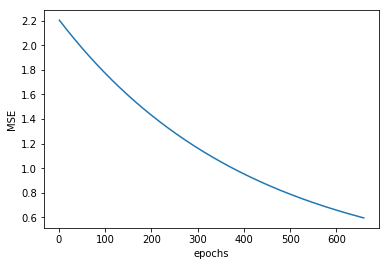

In [226]:
# Let's plot the convergence of MSE values on the train+validation dataset using matplotlib, i.e. #epochs on X-axis and MSE values on Y-axis
fig, axes = plt.subplots()
axes.plot(mse_cache)
axes.set_yscale('linear')
axes.set_xlabel("epochs")
axes.set_ylabel("MSE");

#### 2.9. Evaluation on Test set
**Task 16:** Evaluate your model on test data. (1 point)

In [227]:
# test your model on X_test with the weight vector that you found above
# this will be the generalization error of our model.

# TODO: implement
W_init = np.random.randn(X_test.shape[1])
X_test_new, W_test_new = prepare_data_matrix(X_test, W_init, best_order)

Yhat = get_prediction(X_test_new, weights_train)
mse_test = compute_mse(Yhat, Y_test)


print("MSE achieved on X_test is : {}".format(round(mse_test, 6)))

MSE achieved on X_test is : 0.568746


#### 2.10. Results
**Task 17:** Report the MSE value on the test data. (0.5 point)

MSE of Test is: 0.568746


**Question 6:**  Which hyperparameter combination turned out to be the best? In your understanding, why do you think such a combination turned out to be the best for this task? (0.5 point)

(9, 1e-05, 0.1) with random initialization of weights
(1, 1e-05, 0.8) when all weights are initialzed with 1's

I initialized the weights of W randomly. Therefore on each iteration best hyperparamters combinations vary depending upon the starting point.
In most of the runs I got the above best combination. 

This is expected because the more higher degree we consider the training error reduces due to overfitting. We selected the best hyperparameter combination with the least training error. Therefore polynomail of degree 9 turns out to the  best one.  
